In [122]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("/Users/mumtaz/Documents/personal/loan-payback-prediction/data/train.csv")
test  = pd.read_csv("/Users/mumtaz/Documents/personal/loan-payback-prediction/data/test.csv")


# train = pd.read_csv("path/to/train.csv")
# test = pd.read_csv("path/to/test.csv")

# Null Values Check

In [123]:
train.isnull().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [124]:
# Configuration
class Config:
    """Configuration class for hyperparameters and settings"""
    # N_SPLITS = 5
    # SEED = 42
    TARGET = 'loan_paid_back'
    # VERBOSE = True
    
    # Model weights for ensemble (will be optimized later)
    # WEIGHTS = {
    #     'lgb': 0.33,
    #     'xgb': 0.33,
    #     'cat': 0.34
    # }

config = Config()

# Feature Types

In [125]:
# Separate numerical and categorical columns
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('id')

if config.TARGET in numerical_cols:
    numerical_cols.remove(config.TARGET)

categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

# Combine all feature names
all_features = numerical_cols + categorical_cols
total_features   = len(all_features)
print(f"\nTotal features: {total_features}")


Total features: 11


In [126]:
print(f"Categorical Features: ({len(categorical_cols)})\n")
for i in categorical_cols:
    print(i)

Categorical Features: (6)

gender
marital_status
education_level
employment_status
loan_purpose
grade_subgrade


In [127]:
print(f"Numerical Features: ({len(numerical_cols)})\n")
for i in numerical_cols:
    print(i)


Numerical Features: (5)

annual_income
debt_to_income_ratio
credit_score
loan_amount
interest_rate


## Analysis Of Data Distribution Across Features

In [128]:
# Target distribution
print("TARGET DISTRIBUTION ANALYSIS")

target_counts = train[config.TARGET].value_counts()
target_pct    = train[config.TARGET].value_counts(normalize=True) * 100

target_summary = pd.DataFrame({
    'Value': target_counts.index,
    'Count': target_counts.values,
    'Percentage': target_pct.values
})

display(target_summary.style.background_gradient(cmap='Blues'))

TARGET DISTRIBUTION ANALYSIS


,Value,Count,Percentage
0,1.000000,474494,79.881952
1,0.000000,119500,20.118048


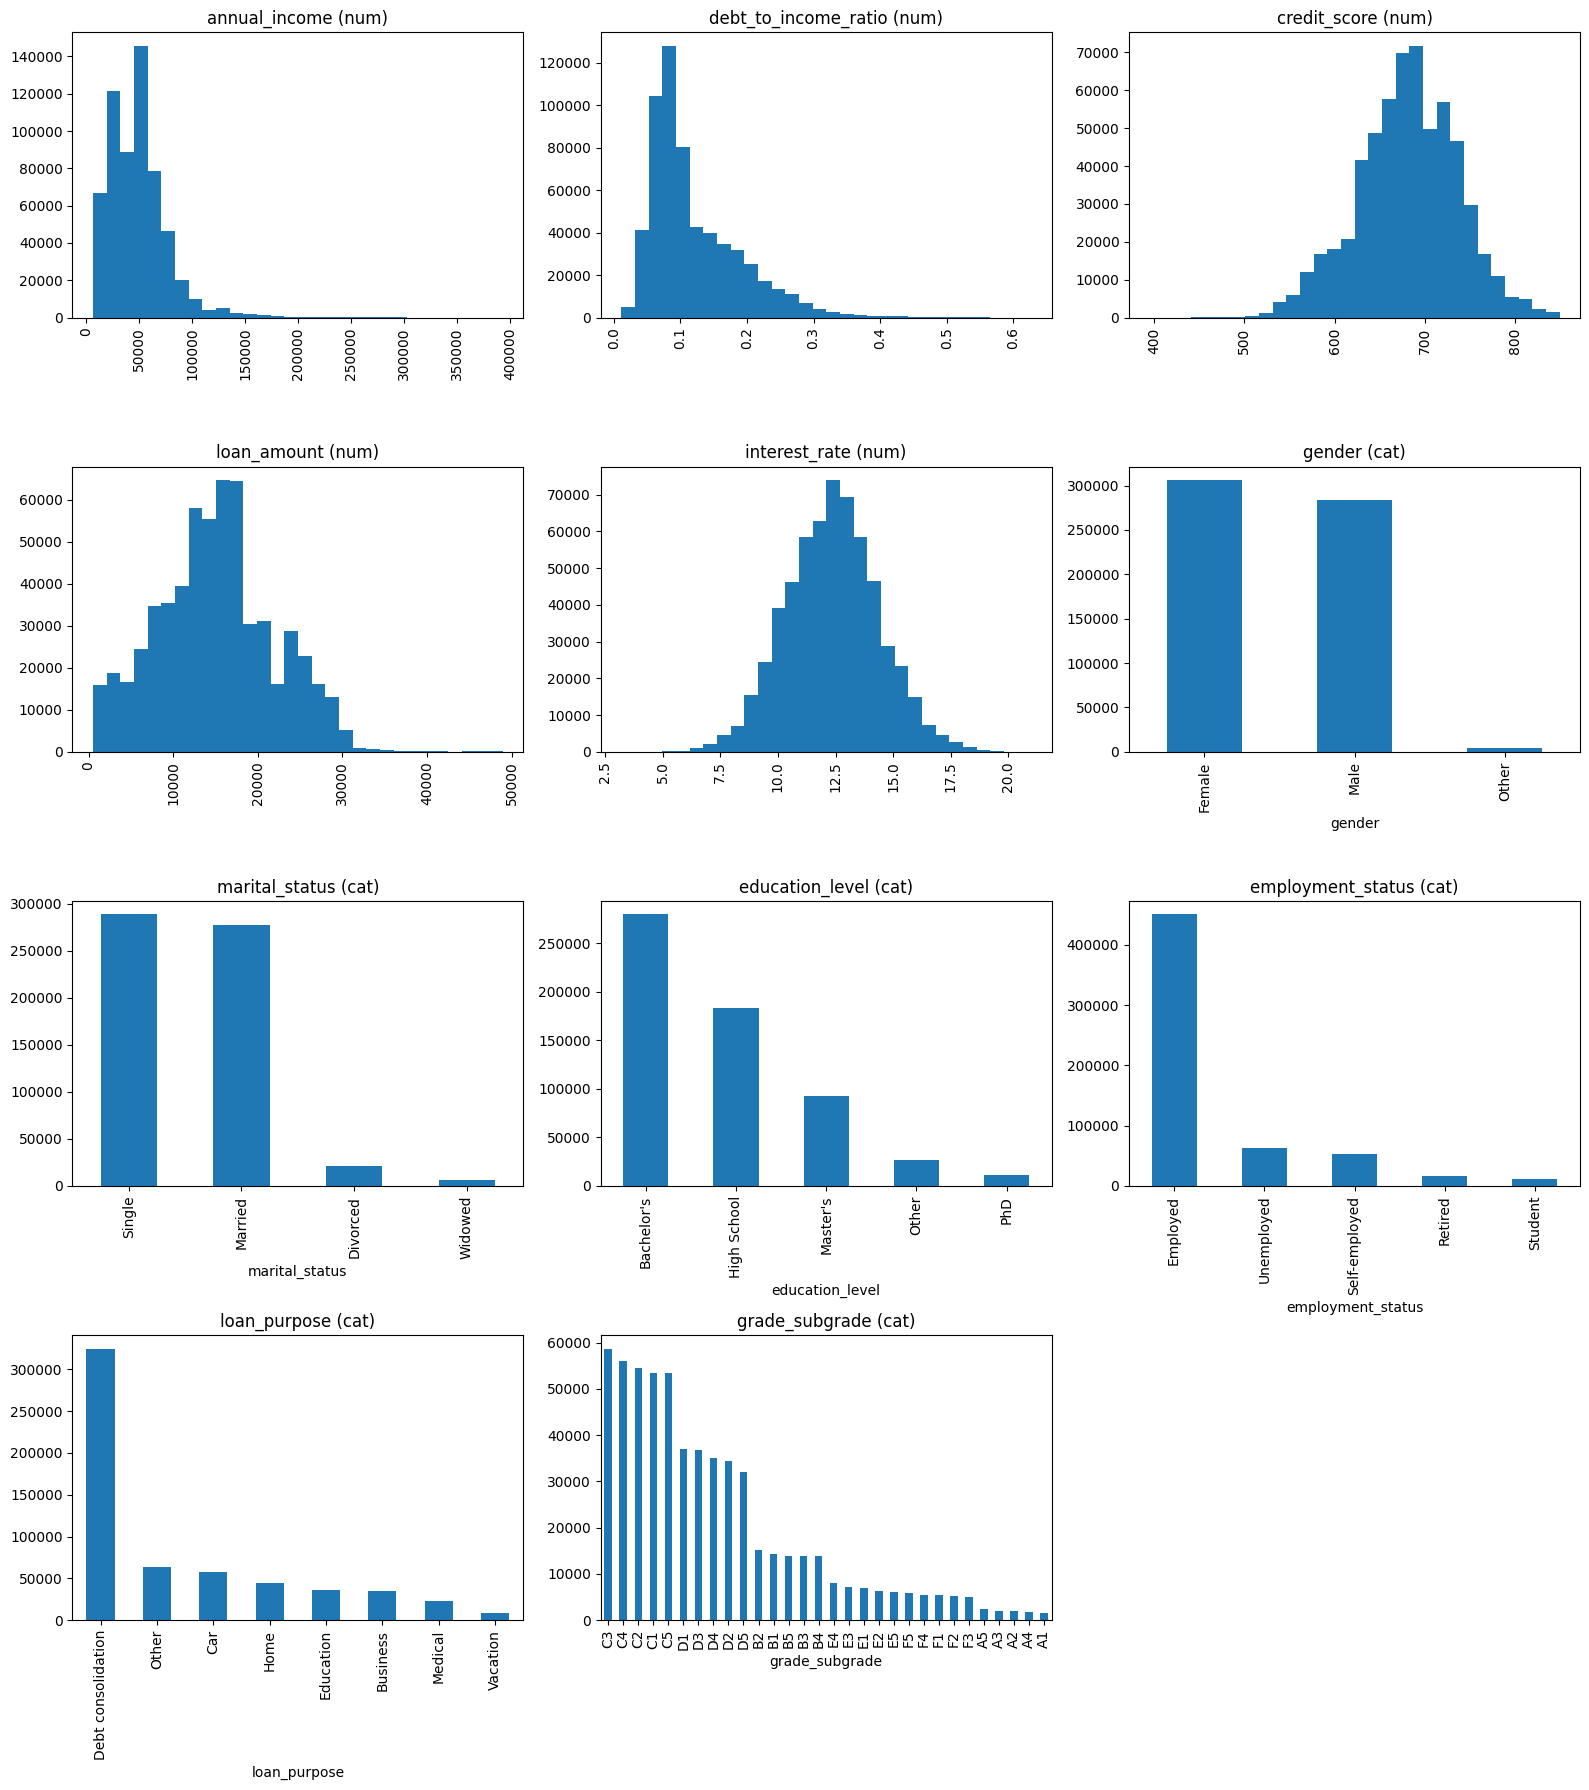

In [129]:
# Define subplot grid (e.g., 4 rows × 3 columns for 11 features)
rows = 4
cols = 3

plt.figure(figsize=(16, 18))

for i, col in enumerate(all_features, 1):
    plt.subplot(rows, cols, i)

    if col in numerical_cols:
        plt.hist(train[col].dropna(), bins=30)
        plt.title(col + " (num)")
    else:
        train[col].value_counts().plot(kind='bar')
        plt.title(col + " (cat)")

    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()

In [130]:
## QQ plot
import scipy.stats as stats

def diagnostic_plots(df, feature):

    plt.figure(figsize=(10, 5)) 
    plt.subplot(1, 2, 1)
    df[feature].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist='norm', plot=plt)
    plt.title(f'QQ Plot of {feature}')

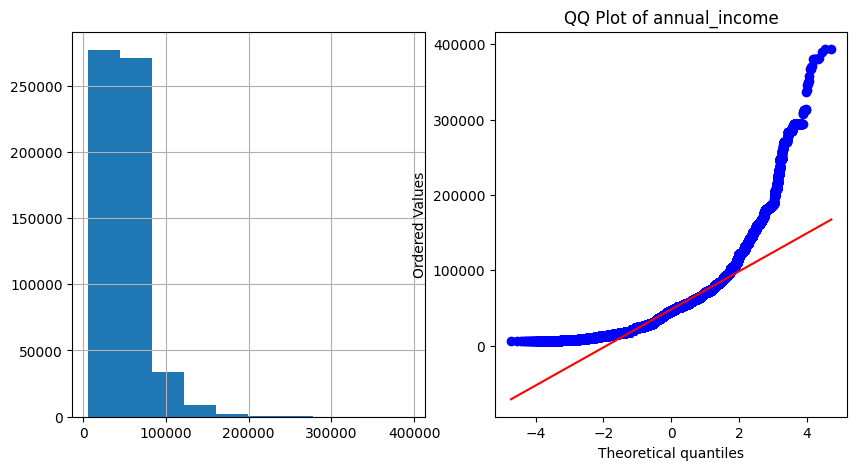

In [131]:
diagnostic_plots(train, 'annual_income')

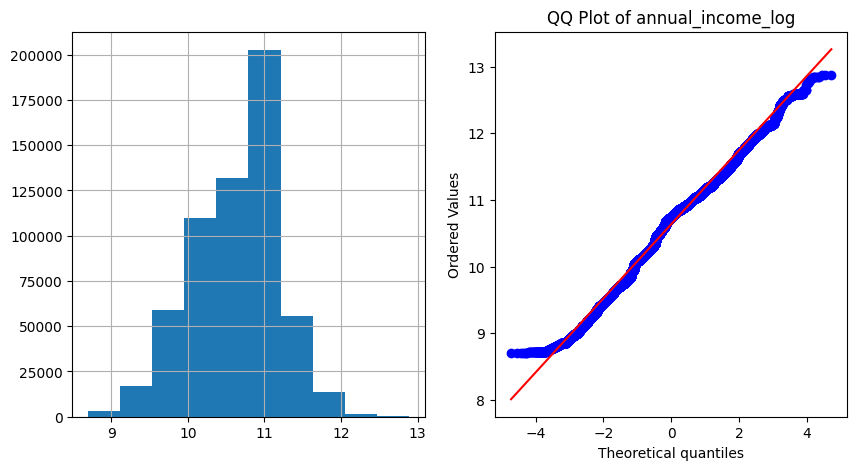

In [132]:
# log transformation
train['annual_income_log'] = np.log(train['annual_income']+1)
diagnostic_plots(train, 'annual_income_log')

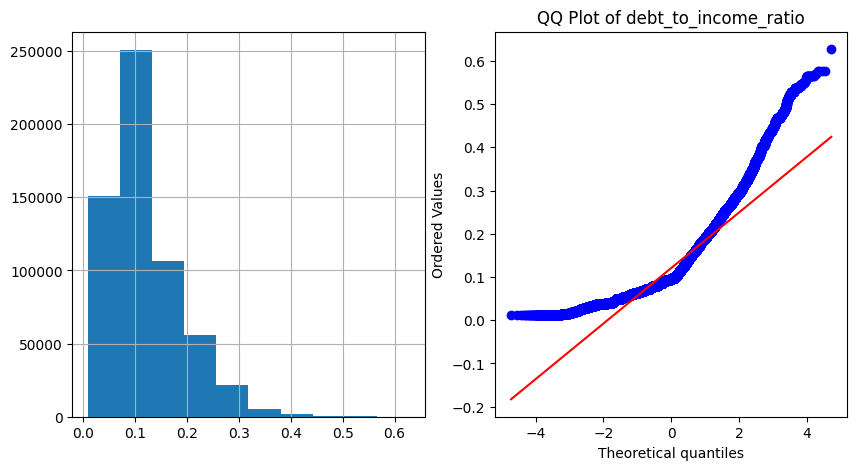

In [133]:
diagnostic_plots(train, 'debt_to_income_ratio')

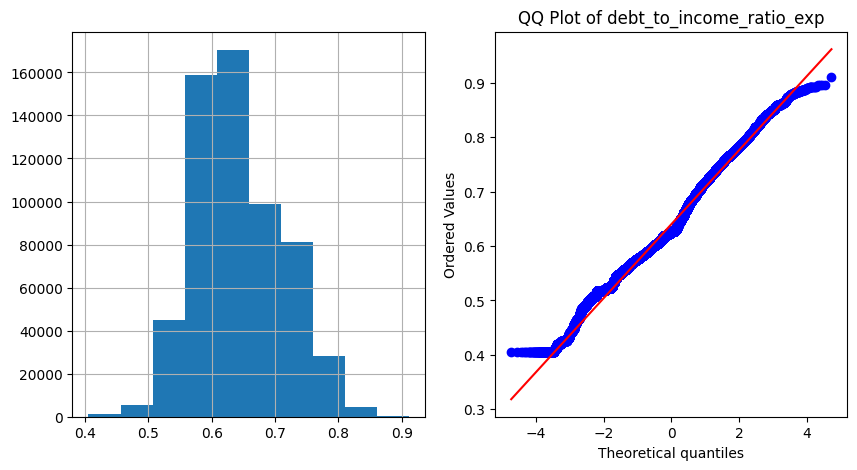

In [134]:
# exponential transformation
train['debt_to_income_ratio_exp'] = train['debt_to_income_ratio']**(1/5)
diagnostic_plots(train, 'debt_to_income_ratio_exp')

In [135]:
# Box Cox Transformation
# train['debt_to_income_ratio_bc'], param = stats.boxcox(train['debt_to_income_ratio']+1) # you can vary the exponent as needed

# print(f"Optimal lambda: {param}")

# diagnostic_plots(train, 'debt_to_income_ratio_bc')